In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from keras import models
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
tf.keras.__version__

'2.10.0'

In [3]:
img_size=48
channal=1
batch_size=32

In [4]:
train=tf.keras.preprocessing.image_dataset_from_directory("train",batch_size=batch_size,color_mode='grayscale',image_size=(48, 48))
test=tf.keras.preprocessing.image_dataset_from_directory("test",batch_size=batch_size,color_mode='grayscale',image_size=(48, 48))

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [5]:
train.class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [6]:
test.class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [7]:
class_name=train.class_names
n_class=len(class_name)

In [8]:
for image_batch, label_batch in train.take(1):
    print(image_batch[0].shape)
    print(label_batch.numpy())

(48, 48, 1)
[3 4 2 3 0 3 3 4 4 2 5 5 5 0 4 4 2 0 6 4 6 2 5 0 4 3 6 5 6 5 5 0]


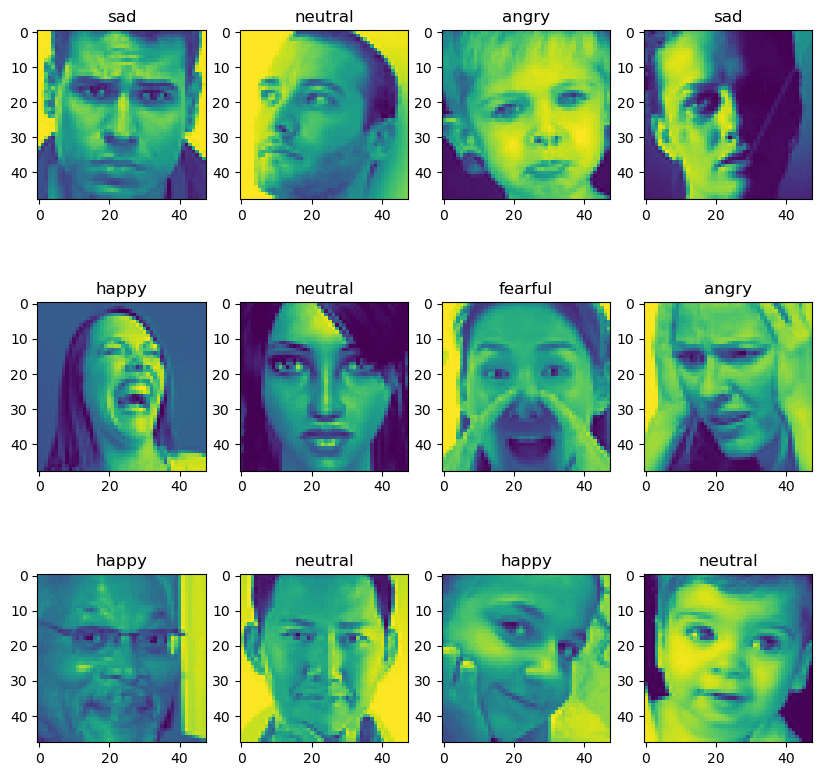

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])

In [10]:
len(train)

898

In [11]:
type(train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [12]:
898*32

28736

In [13]:
len(test)

225

In [14]:
898+225

1123

In [15]:
def split_val_test(test_df):
    val_data=test_df.take(112)
    test_data=test_df.skip(112)
    return val_data, test_data

In [16]:
val_data,test_data=split_val_test(test)

In [17]:
len(val_data),len(test_data)

(112, 113)

In [18]:
val_data

<TakeDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
test_data

<SkipDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
resize_and_rescale=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(48,48),
                                       layers.experimental.preprocessing.Rescaling(1.0/255)])

```data_augumentation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                                       layers.experimental.preprocessing.RandomRotation(0.2)])```

In [21]:
# Model1
"""model=models.Sequential([resize_and_rescale,
                       layers.Conv2D(filters=32,kernel_size=(3,3),
                                    activation="relu",input_shape=(48,48,1)),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=32,kernel_size=(3,3),
                                    activation="relu"),
                       layers.MaxPooling2D((2,2)),
                       layers.Flatten(),
                       layers.Dense(64,activation="relu"),
                       layers.Dropout(0.2),
                       layers.Dense(32,activation="relu"),
                       layers.Dropout(0.2),
                       layers.Dense(n_class,activation="softmax") 
                       ])
model.build(input_shape=(32,48,48,1))"""

'model=models.Sequential([resize_and_rescale,\n                       layers.Conv2D(filters=32,kernel_size=(3,3),\n                                    activation="relu",input_shape=(48,48,1)),\n                       layers.MaxPooling2D((2,2)),\n                       layers.Conv2D(filters=32,kernel_size=(3,3),\n                                    activation="relu"),\n                       layers.MaxPooling2D((2,2)),\n                       layers.Flatten(),\n                       layers.Dense(64,activation="relu"),\n                       layers.Dropout(0.2),\n                       layers.Dense(32,activation="relu"),\n                       layers.Dropout(0.2),\n                       layers.Dense(n_class,activation="softmax") \n                       ])\nmodel.build(input_shape=(32,48,48,1))'

In [22]:
# Model2
model=models.Sequential([resize_and_rescale,
                       layers.Conv2D(32, kernel_size=(3, 3), padding='same', 
                                     activation='relu', input_shape=(48, 48,1)),
                       layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
                       layers.BatchNormalization(),
                       layers.MaxPool2D(pool_size=(2, 2)),
                       layers.Dropout(0.25),
                       layers.Conv2D(128,(5,5), padding='same', activation='relu'),
                       layers.BatchNormalization(),
                       layers.MaxPool2D(pool_size=(2, 2)),
                       layers.Dropout(0.25),
                       layers.Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                       layers.BatchNormalization(),
                       layers.MaxPool2D(pool_size=(2, 2)),
                       layers.Dropout(0.25),
                       layers.Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                       layers.BatchNormalization(),
                       layers.MaxPool2D(pool_size=(2, 2)),
                       layers.Dropout(0.25),
                       layers.Flatten(), 
                       layers.Dense(256,activation = 'relu'),
                       layers.BatchNormalization(),
                       layers.Dropout(0.25),
    
                       layers.Dense(512,activation = 'relu'),
                       layers.BatchNormalization(),
                       layers.Dropout(0.25),

                       layers.Dense(n_class, activation='softmax'),
                         
                       ])
model.build(input_shape=(32,48,48,1))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 48, 48, 1)           0         
                                                                 
 conv2d (Conv2D)             (32, 48, 48, 32)          320       
                                                                 
 conv2d_1 (Conv2D)           (32, 48, 48, 64)          18496     
                                                                 
 batch_normalization (BatchN  (32, 48, 48, 64)         256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (32, 24, 24, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (32, 24, 24, 64)         

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [ ]:
Epoch=16
history=model.fit(train,epochs=Epoch,
         batch_size=32,
         verbose=1,
         validation_data=val_data)

Epoch 1/16
898/898 [==============================] - 873s 970ms/step - loss: 8.9232 - accuracy: 0.2190 - val_loss: 7.8146 - val_accuracy: 0.2910
Epoch 2/16
898/898 [==============================] - 876s 976ms/step - loss: 7.1489 - accuracy: 0.2858 - val_loss: 6.2639 - val_accuracy: 0.3262
Epoch 3/16
898/898 [==============================] - 896s 997ms/step - loss: 5.5338 - accuracy: 0.3482 - val_loss: 4.8149 - val_accuracy: 0.3943
Epoch 4/16
365/898 [===========>..................] - ETA: 8:37 - loss: 4.6529 - accuracy: 0.3745

In [49]:
history.history.keys()


In [50]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]

loss= history.history["loss"]
val_loss=history.history["val_loss"]

In [51]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epoch),acc,label="Training Accuracy")
plt.plot(range(Epoch),val_acc,label="Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(Epoch),loss,label="Training loss")
plt.plot(range(Epoch),val_loss,label="Validation loss")

plt.show()

In [52]:
for image_batch,label_batch in test_data.take(1):
    first_image=image_batch[0]
    first_label=label_batch[0]
    print("First image to predict")
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("Actual Label: ", class_name[first_label])
    batch_prediction=model.predict(image_batch,verbose=0)
    print("Predicted Label: ",class_name[np.argmax(batch_prediction[0])])

In [35]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array=tf.expand_dims(img_array,0)
    prediction=model.predict(img_array,verbose=0)
    predicted_class=class_name[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])),2)
    return predicted_class, confidence

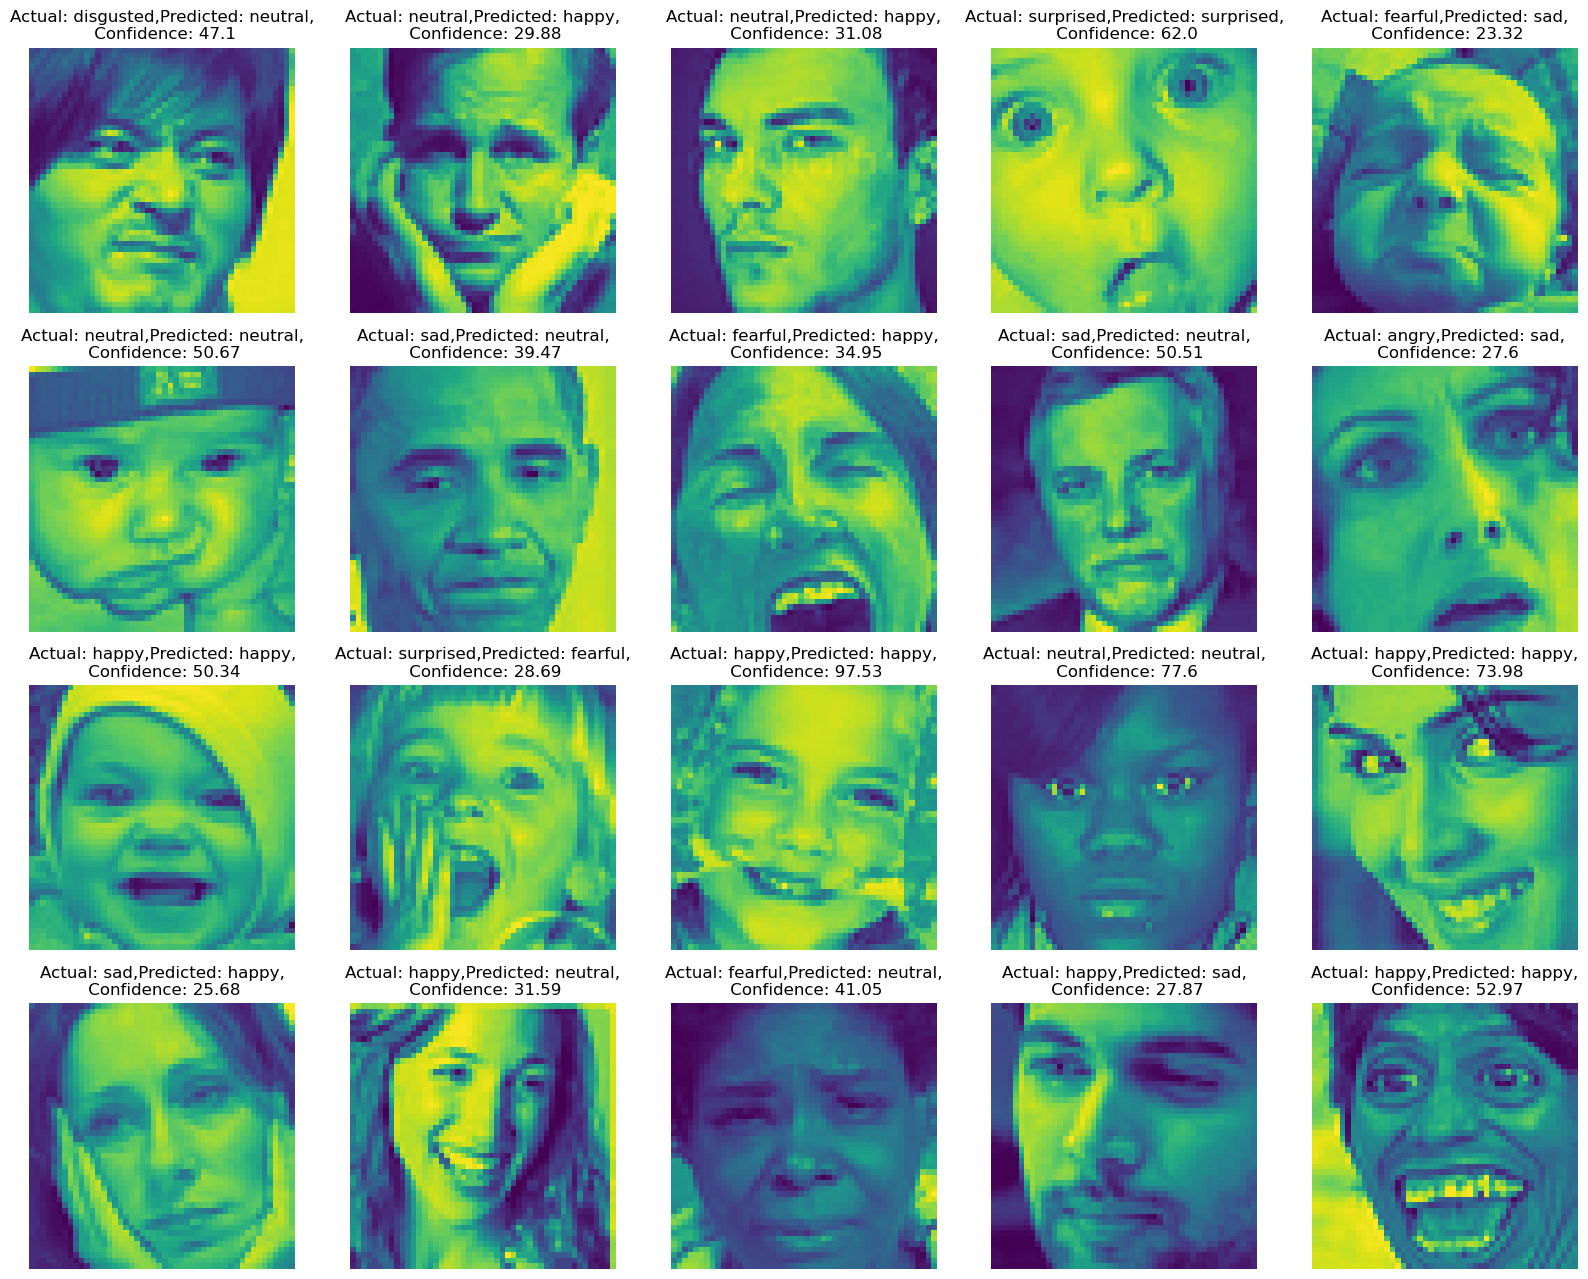

In [36]:
plt.figure(figsize=(20,20))
for image_batch,label_batch in test_data.take(1):
    for i in range(20):
        plt.subplot(5,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        predicted_class, confidence=predict(model,image_batch[i])
        actual_class=class_name[label_batch[i]]
        plt.title(f"Actual: {actual_class},Predicted: {predicted_class},\n Confidence: {confidence}")

In [37]:
import os
model_name=max([int(i) for i in os.listdir("saved_model/")+[0]])+1
model.save(f"saved_model/{model_name}")

INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets
